## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [8]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
import numpy as np
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - np.min(x))/(np.max(x) -  np.min(x))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0810 19:37:25.945459 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 19:37:25.960392 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 19:37:25.962387 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0810 19:37:45.013340 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 19:37:45.019332 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0810 19:37:47.130902 15224 deprecation.py:323] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 19:37:47.176806 15224 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 126us/step - loss: 2.0248 - acc: 0.2465 - val_loss: 1.9558 - val_acc: 0.2884
Epoch 2/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.8012 - acc: 0.3467 - val_loss: 1.7158 - val_acc: 0.3822
Epoch 3/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.6978 - acc: 0.3896 - val_loss: 1.6752 - val_acc: 0.3966
Epoch 4/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.6333 - acc: 0.4123 - val_loss: 1.5878 - val_acc: 0.4359
Epoch 5/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.5843 - acc: 0.4332 - val_loss: 1.5756 - val_acc: 0.4336
Epoch 6/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.5317 - acc: 0.4534 - val_loss: 1.5232 - val_acc: 0.4582
Epoch 7/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.4877 - acc: 0.4687 - val_loss: 1.

50000/50000 [==============================] - 6s 115us/step - loss: 0.5786 - acc: 0.7928 - val_loss: 2.0350 - val_acc: 0.5056
Epoch 60/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.5669 - acc: 0.7976 - val_loss: 2.0450 - val_acc: 0.5116
Epoch 61/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.5557 - acc: 0.7986 - val_loss: 2.1388 - val_acc: 0.5040
Epoch 62/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.5520 - acc: 0.8034 - val_loss: 2.1278 - val_acc: 0.5090
Epoch 63/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.5319 - acc: 0.8086 - val_loss: 2.1892 - val_acc: 0.5068
Epoch 64/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.5363 - acc: 0.8073 - val_loss: 2.1267 - val_acc: 0.4981
Epoch 65/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.5277 - acc: 0.8087 - val_loss: 2.1877 - val_acc: 0.5098
Epoch 66/100
50000/50000 [=======

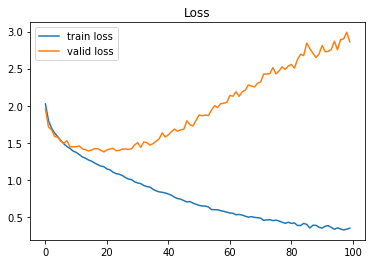

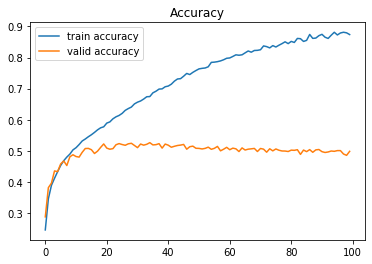

In [17]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()